In [2]:
import os
import json
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')
def get_or_create_value(function_to_apply, file_path):
    # Check if the file exists
    if os.path.exists(file_path):
        # Load the value from the file
        with open(file_path, 'r') as file:
            value = json.load(file)
    else:
        # Call the function to create the value
        value = function_to_apply()
        # Save the value to the file
        with open(file_path, 'w') as file:
            json.dump(value, file)
    
    return value

def boxplot_communities(y,x, title, yscale = None):
    fig, ax = plt.subplots(figsize=(10,6))
    # Create a boxplot
    ax.boxplot(y, labels=x)

    # Add titles and labels
    ax.set_title(title)
    ax.set_ylabel('Values')
    ax.set_xlabel('Categories')
    if yscale != None:
        ax.set_yscale('log')
    # Show the plot
    fig.show()

In [3]:
game_data = get_or_create_value(lambda: {}, "game_data_with_vader_sentiment.json")

In [4]:
import re
for game, data in game_data.items():
    match = re.match(r'^\d+', data["categorie"])
    if match:
        data["year"] = int(match.group())
    else:
        raise RuntimeError()
    data.pop("categorie")

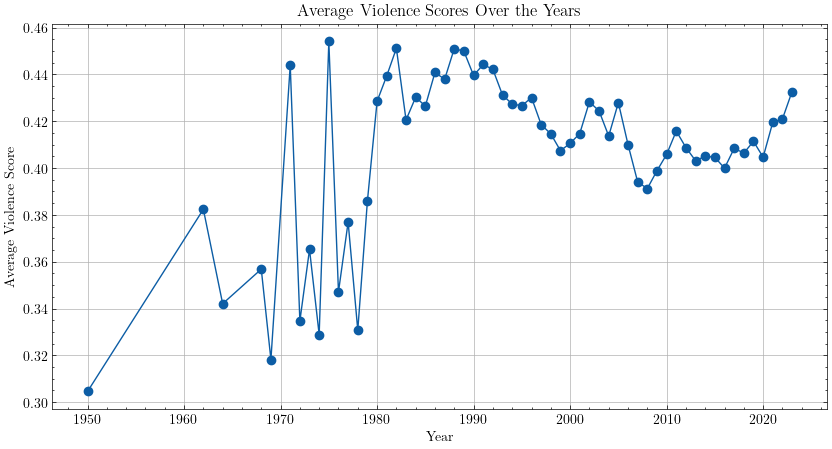

In [5]:
from collections import defaultdict
import matplotlib.pyplot as plt
# Plotting

# Example data, including multiple entries per year to demonstrate averaging

# Initialize dictionaries to sum violence scores and count entries per year
violence_sum_per_year = defaultdict(float)
count_per_year = defaultdict(int)

# Sum violence scores and count entries for each year
for game in game_data.values():
    year = game['year']
    violence_sum_per_year[year] += game["sentiment"]['violence']
    count_per_year[year] += 1

# Calculate the average violence score for each year
average_violence_per_year = {year: violence_sum_per_year[year] / count_per_year[year] for year in violence_sum_per_year}

# Sort the data by year
sorted_years = sorted(average_violence_per_year.keys())
average_violences = [average_violence_per_year[year] for year in sorted_years]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(sorted_years, average_violences, marker='o')

plt.title('Average Violence Scores Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Violence Score')
plt.grid(True)
plt.show()

C:\Users\padol\AppData\Local\Temp\ipykernel_22208\1439431601.py:63: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(sorted_years, average_violences, 10)


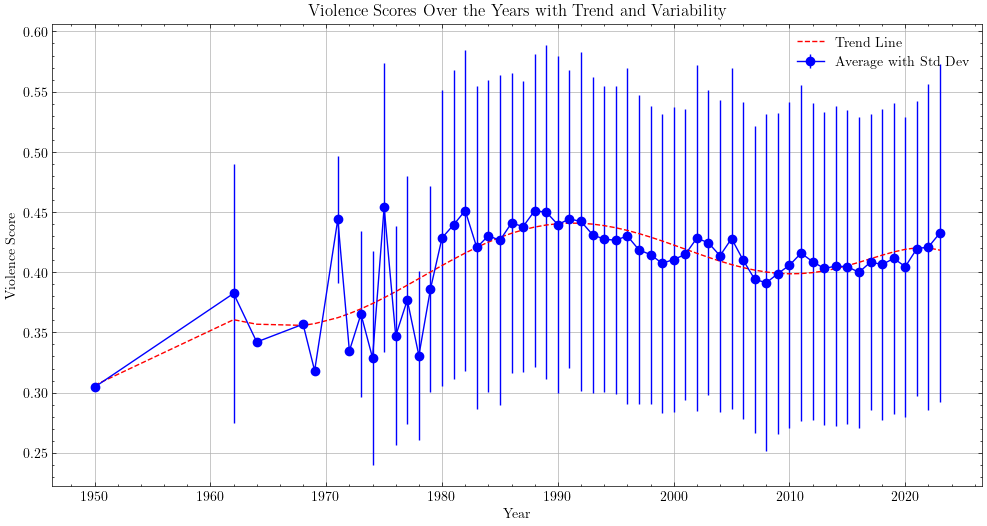

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from collections import defaultdict
import numpy as np

def calculate_sentiment_statistics(game_data: dict, sentiment_key: str):
    """
    Calculate the average and standard deviation of specified sentiment scores per year from a dataset
    where each entry is a dictionary containing a year and a nested 'sentiment' dictionary with sentiment scores.

    :param game_data: Dictionary of dictionaries with 'year' and nested 'sentiment' dictionary.
    :param sentiment_key: Key for the sentiment score to be calculated (e.g., 'violence', 'compound').
    :return: Two dictionaries with years as keys and average scores and standard deviations as values.
    """
    sentiment_sum_per_year = defaultdict(float)
    count_per_year = defaultdict(int)

    # Sum sentiment scores and count entries for each year
    for game in game_data.values():
        try:
            year = game['year']
            sentiment_score = game["sentiment"][sentiment_key]
            sentiment_sum_per_year[year] += sentiment_score
            count_per_year[year] += 1
        except KeyError as e:
            print(f"Missing key in data: {e}")

    # Calculate the average sentiment score for each year
    average_sentiment_per_year = {year: sentiment_sum_per_year[year] / count_per_year[year]
                                  for year in sentiment_sum_per_year}

    # Calculate standard deviation for each year
    std_dev_per_year = {year: np.std([game["sentiment"][sentiment_key] 
                                      for game in game_data.values() if game['year'] == year])
                        for year in count_per_year}

    return average_sentiment_per_year, std_dev_per_year



def plot_violence_statistics(average_violence, std_deviation):
    """
    Plot the violence statistics.

    :param average_violence: Dictionary of average violence scores per year.
    :param std_deviation: Dictionary of standard deviations per year.
    """
    # Sort the data by year
    sorted_years = sorted(average_violence.keys())
    average_violences = [average_violence[year] for year in sorted_years]
    std_devs = [std_deviation[year] for year in sorted_years]

    # Plotting with enhancements
    plt.figure(figsize=(12, 6))

    # Plot average violence scores with error bars
    plt.errorbar(sorted_years, average_violences, yerr=std_devs, fmt='-o',
                 label='Average with Std Dev', color='blue')

    # Fit and plot a trend line
    z = np.polyfit(sorted_years, average_violences, 10)
    p = np.poly1d(z)
    plt.plot(sorted_years, p(sorted_years), "r--", label='Trend Line')

    # Labels and title
    plt.title('Violence Scores Over the Years with Trend and Variability')
    plt.xlabel('Year')
    plt.ylabel('Violence Score')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


average_violence, std_deviation = calculate_sentiment_statistics(game_data, "violence")
plot_violence_statistics(average_violence, std_deviation)


C:\Users\padol\AppData\Local\Temp\ipykernel_22208\1439431601.py:63: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(sorted_years, average_violences, 10)


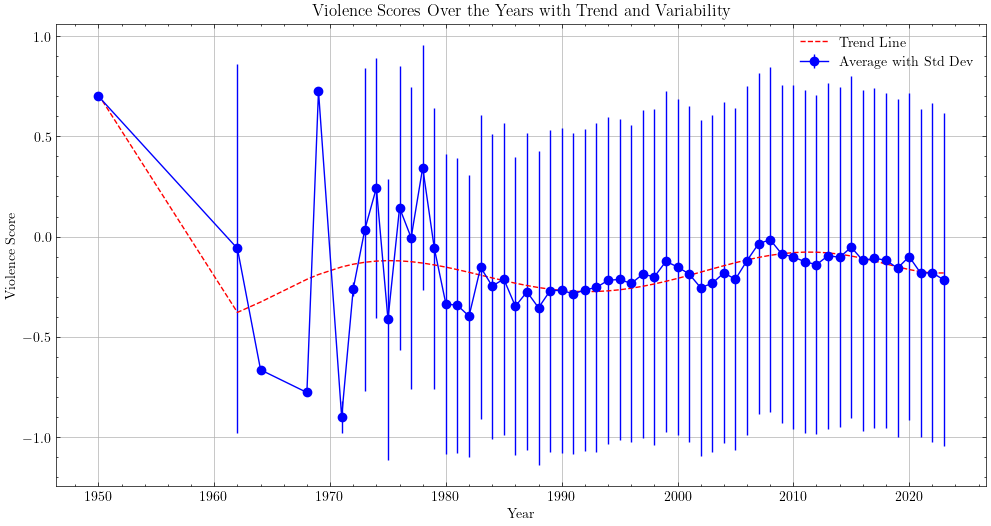

In [7]:
average_compound, std_dev_compound = calculate_sentiment_statistics(game_data, 'compound')
plot_violence_statistics(average_compound, std_dev_compound)

In [8]:
game_data

{'Bertie the Brain': {'text': {'introduction': 'Bertie the Brain is one of the first games developed in the early history of video games. It was built in Toronto by Josef Kates for the 1950 Canadian National Exhibition. The four meter (13 foot) tall computer allowed exhibition attendees to play a game of tic-tac-toe against an artificial intelligence. The player entered a move on a keypad in the form of a three-by-three grid, and the game played out on a grid of lights overhead. The machine had an adjustable difficulty level. After two weeks on display by Rogers Majestic, the machine was disassembled at the end of the exhibition and largely forgotten as a curiosity.\n\nKates built the game to showcase his additron tube, a miniature version of the vacuum tube, though the transistor overtook it in computer development shortly thereafter. Patent issues prevented the additron tube from being used in computers besides Bertie before it was no longer useful. Bertie the Brain is a candidate fo

In [9]:
from collections import Counter


unique_categories = Counter()
counter = 0
for game, content in game_data.items():
        if len(content['country of development']) > 1:
                counter += 1
        unique_categories.update(content['country of development'])

# Display the unique keys
unique_categories, counter


(Counter({'Japan': 5241,
          'the United States': 4949,
          'the United Kingdom': 2163,
          'Canada': 768,
          'France': 494,
          'other': 468,
          'Germany': 342,
          'Australia': 260,
          'Sweden': 253,
          'Poland': 154,
          'South Korea': 149,
          'Russia': 145,
          'Spain': 135,
          'the Czech Republic': 129,
          'Finland': 124,
          'the Netherlands': 113,
          'China': 97,
          'Italy': 83,
          'Hungary': 79,
          'Denmark': 66,
          'Ukraine': 54,
          'Romania': 47,
          'Taiwan': 46,
          'Austria': 36,
          'Slovakia': 34,
          'Norway': 29,
          'Bulgaria': 29,
          'Belgium': 26,
          'New Zealand': 26,
          'Brazil': 25,
          'Croatia': 23,
          'Ireland': 22,
          'Switzerland': 15,
          'Chile': 15,
          'Greece': 14,
          'Israel': 13,
          'Singapore': 13,
          'Argentina

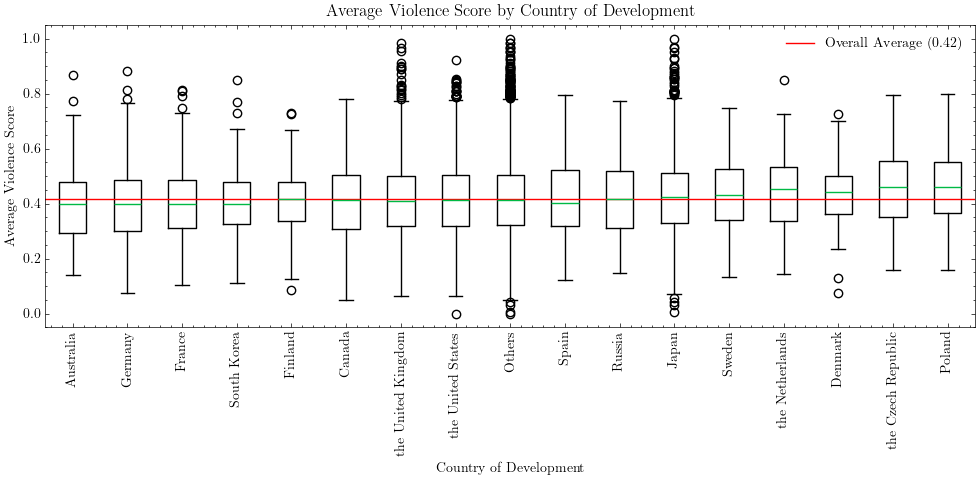

In [82]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# Assuming game_data is a dictionary where the key is the game name and the value is another dictionary
# that includes 'country of development' and 'violence' score within a 'sentiment' sub-dictionary.

# Step 1: Extract relevant data
country_violence_data = defaultdict(list)
for game, details in game_data.items():
    # We assume 'violence' scores are within a 'sentiment' sub-dictionary
    violence_score = details["sentiment"]["violence"]
    for country in details["country of development"]:
        country_violence_data[country].append(violence_score)

# Step 2: Count the number of games per country
game_counts = Counter({country: len(scores) for country, scores in country_violence_data.items()})

# Step 3: Calculate average violence score for each country with at least 100 games or is Denmark
violence_scores_by_country = {}
for country, violence_scores in country_violence_data.items():
    if (game_counts[country] >= 100 or country == "Denmark") and country != "other":
        violence_scores_by_country[country] = violence_scores

# Step 4: Add all other countries to 'Others'
other_violence_scores = []
for country, violence_scores in country_violence_data.items():
    if (game_counts[country] < 100 and country != "Denmark") or "other":
        other_violence_scores.extend(violence_scores)
if other_violence_scores:
    violence_scores_by_country["Others"] = other_violence_scores


# Calculate overall average violence score
all_scores = [score for scores in country_violence_data.values() for score in scores]
overall_average_violence = sum(all_scores) / len(all_scores)

# Step 5: Plot the average violence scores
countries = sorted(list(violence_scores_by_country.keys()), key= lambda x: np.average(violence_scores_by_country[x])) 
countries = [countries]
violences = [violence_scores_by_country[country] for country in countries]

plt.figure(figsize=(10, 5))
plt.boxplot(violences,labels=countries)
plt.xlabel('Country of Development')
plt.ylabel('Average Violence Score')
plt.title('Average Violence Score by Country of Development')
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Add a line for the overall average violence level
plt.axhline(y=overall_average_violence, color='r', linestyle='-', label=f'Overall Average ({overall_average_violence:.2f})')
plt.legend()
plt.show()


In [11]:
unique_categories = Counter()
for game, content in game_data.items():
        unique_categories.update(content['categories'])

# Display the unique keys
unique_categories

Counter({'Windows games': 6968,
         'Single-player video games': 6091,
         'Multiplayer and single-player video games': 5403,
         'Video games developed in Japan': 5241,
         'Video games developed in the United States': 4949,
         'PlayStation 4 games': 2258,
         'Video games developed in the United Kingdom': 2163,
         'MacOS games': 1900,
         'Nintendo Switch games': 1871,
         'Video game sequels': 1799,
         'IOS games': 1716,
         'Xbox One games': 1715,
         'Video games featuring female protagonists': 1596,
         'PlayStation 2 games': 1420,
         'Windows-only games': 1342,
         'DOS games': 1320,
         'Arcade video games': 1311,
         'Role-playing video games': 1310,
         'Android (operating system) games': 1302,
         'PlayStation 3 games': 1268,
         'Indie games': 1229,
         'Science fiction video games': 1154,
         'Xbox 360 games': 1143,
         'Linux games': 1139,
         'PlayS

In [12]:
with open("categories_counter.json", 'w') as file:
    json.dump(unique_categories, file)

In [13]:
platform_cluster = {
    "PlayStation_Games": [
      "PlayStation (console) games",
      "PlayStation Network games",
      "PlayStation Portable games",
      "PlayStation 4 games",
      "PlayStation 2 games",
      "PlayStation 3 games",
      "PlayStation Vita games",
      "PlayStation 5 games",
      "PlayStation (console)-only games",
      "PlayStation 4 Pro enhanced games",
      "PlayStation 2-only games",
      "PlayStation Portable-only games",
      "PlayStation 3-only games"
    ],
    "Nintendo_Games": [
      "Nintendo DS games",
      "Nintendo DS-only games",
      "Game Boy Advance games",
      "Game Boy Color games",
      "Game Boy games",
      "Game Boy Advance-only games",
      "Virtual Console games for Wii U",
      "Wii games",
      "Wii U games",
      "Wii U eShop games",
      "Wii-only games",
      "Nintendo 64 games",
      "Super Nintendo Entertainment System games",
      "Nintendo Entertainment System games",
      "Nintendo Switch games",
      "Nintendo Switch Online games",
      "Virtual Console games for Nintendo 3DS",
      "Nintendo 3DS eShop games",
      "Nintendo Entertainment System-only games",
      "Nintendo 3DS games",
      "Nintendo Wi-Fi Connection games",
      "Super Nintendo Entertainment System-only games",
      "Nintendo Network games",
      "Nintendo 3DS-only games"
    ],
    "Xbox_Games": [
      "Xbox 360 games",
      "Xbox 360 Live Arcade games",
      "Xbox games",
      "Xbox One games",
      "Xbox Cloud Gaming games",
      "Xbox Series X and Series S games",
      "Xbox One X enhanced games",
      "Xbox 360-only games"
    ],
    "PC_Games": [
      "Windows games",
      "Games for Windows",
      "Windows-only games",
      "Linux games",
      "DOS games",
      "MacOS games",
      "Browser games",
      "Classic Mac OS games",
      "Apple II games",
      "Amstrad CPC games",
      "MSX games",
      "NEC PC-9801 games",
      "ZX Spectrum games",
      "NEC PC-8801 games",
      "ScummVM-supported games",
      "BBC Micro and Acorn Electron games",
      "DOS-only games"
    ],
    "Mobile_Games": [
      "Windows Phone games",
      "IOS games",
      "Android (operating system) games"
    ],
    "Other_Platforms": [
      "Sega arcade games",
      "Sega Saturn games",
      "Sega video games",
      "Sega Genesis games",
      "Sega CD games",
      "Game Gear games",
      "TurboGrafx-CD games",
      "TurboGrafx-16 games",
      "Dreamcast games",
      "Master System games",
      "Commodore 64 games",
      "Amiga games",
      "Atari games",
      "Atari 8-bit family games",
      "Atari 2600 games",
      "Atari ST games"
    ]
  }

In [27]:
gameplay_cluster = {
    "Shooters": [
      "First-person shooters",
      "Third-person shooters",
      "Shoot 'em ups",
      "Vertically scrolling shooters",
      "Horizontally scrolling shooters"
      "Light gun games",
      "Run and gun games",
    ],
    "Role_Playing_Games": [
      "Role-playing video games",
      "Action role-playing video games",
      "Tactical role-playing video games",
      "Japanese role-playing video games"
    ],
    "Strategy_Games": [
      "Strategy video games",
      "Turn-based strategy video games",
      "Real-time strategy video games",
      "Turn-based tactics video games",
      "Real-time tactics video games"
    ],
    "Adventure_Games": [
      "Adventure games",
      "Action-adventure games",
      "Point-and-click adventure games",
      "First-person adventure games",
      "Detective video games"
    ],
    "Fighting_and_Combat": [
      "Combat flight simulators",
      "Fighting games",
      "Vehicular combat games",
      "3D fighting games"
      "Stealth video games",
      "Hack and slash games",
      "Beat 'em ups",
      "Roguelike video games",
      "Side-scrolling beat 'em ups",
    ],
    "Family":[
      "Music video games",
      "Party video games"
      "Racing video games",
      "Puzzle video games",
      "Puzzle-platform games",
      "Maze games",
    ],
    "Symulation": [
      "Simulation video games",
      "Business simulation games",
    ],
    "Other": [
      "Platformers",
      "Top-down video games",
      "Side-scrolling video games",
      "Side-scrolling platform games",
    ]
  }

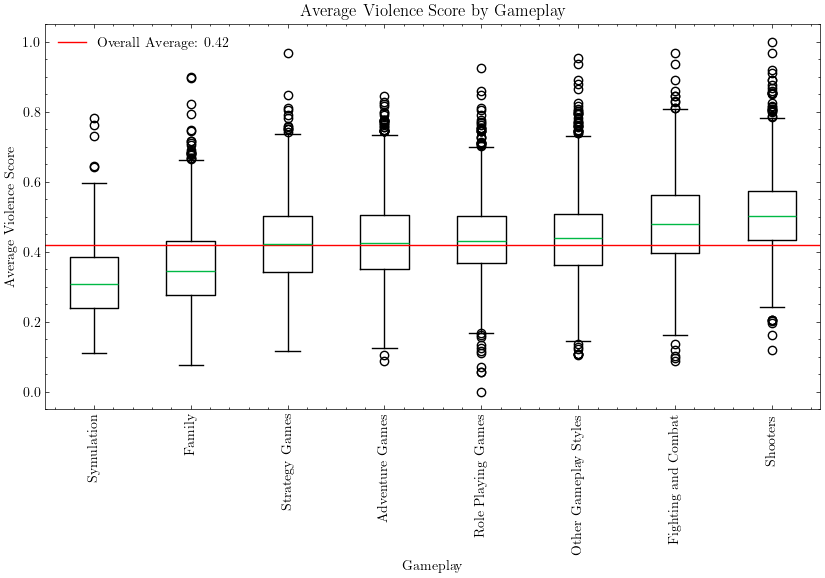

In [28]:
# Example usage:
average_scores = calculate_average_sentiment(game_data, gameplay_cluster)
plot_sentiment_scores(average_scores, "Genres")

In [95]:
import numpy 
numpy.percentile([0,0,5], [51, 52])

array([0.1, 0.2])